In [0]:
#blob Detection 

In [2]:

# import drive
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
my_path = '/content/drive/My Drive/Research/'


In [0]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import numpy as np

import matplotlib.pyplot as plt

In [0]:
# PVN IMAGE
from PIL import Image
import numpy
img_pvn = Image.open('/content/drive/My Drive/Research/blob.jpg')

In [0]:
#Code for PVN image

# PVN IMAGE RGBA -> RGB
#img_pvn.load()
#background = Image.new("RGB", img_pvn.size, (255, 255, 255))
#background.paste(img_pvn, mask = img_pvn.split()[3])
#background.save("img_pvn_final.jpg", "JPEG", quality=100)

#rgb_image = Image.open("img_pvn_final.jpg")


In [0]:
#Code for blob image
from PIL import Image, ImageOps

im = Image.open('/content/drive/My Drive/Research/blob.jpg')
rgb_image = ImageOps.invert(im)


In [0]:
# PVN IMAGE
np_img_pvn = numpy.array(rgb_image)
image_gray_pvn = rgb2gray(np_img_pvn)

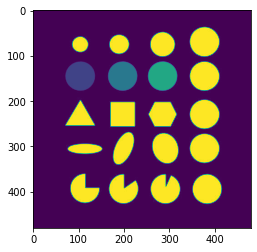

In [8]:
plt.imshow(image_gray_pvn)
#plt.imshow(image_gray)

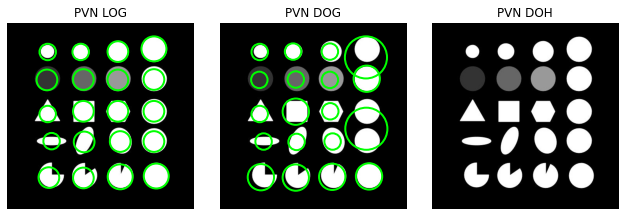

In [9]:
#SAMPLE IMAGE

# Compute radii in the 3rd column.
#blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
#threshold=.1
blobs_log_pvn = blob_log(image_gray_pvn, min_sigma=15, max_sigma=50, num_sigma=10, threshold=.1)
blobs_log_pvn[:, 2] = blobs_log_pvn[:, 2] * sqrt(2)

blobs_dog_pvn = blob_dog(image_gray_pvn, min_sigma=15, max_sigma=50, threshold=.1)
blobs_dog_pvn[:, 2] = blobs_dog_pvn[:, 2] * sqrt(2)

blobs_doh_pvn = blob_doh(image_gray_pvn, min_sigma=15, max_sigma=50, threshold=.1)
blobs_doh_pvn[:, 2] = blobs_doh_pvn[:, 2] * sqrt(2)

blobs_list = [blobs_log_pvn, blobs_dog_pvn, blobs_doh_pvn]
colors = ['lime', 'lime', 'lime']
titles = ['PVN LOG', 'PVN DOG', 'PVN DOH']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(rgb_image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()